In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../artifacts/sentiment_analysis.csv")

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# ##Text Preprocessing

In [63]:
import re
import string

In [64]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

convert uppercase to lowercase

In [65]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split())) 

In [66]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [67]:
data["tweet"].head(7)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
Name: tweet, dtype: object

# remove links

In [68]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(re.sub(r'^https?:\/\/.*[\r\n]*','',x, flags=re.MULTILINE) for x in x.split()))

In [69]:
data["tweet"].head(7)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
Name: tweet, dtype: object

Remove punctuations

In [70]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [71]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
        return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [72]:
data["tweet"].head(7)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
Name: tweet, dtype: object

In [73]:
data["tweet"].head(7)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
Name: tweet, dtype: object

In [74]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)


In [75]:
data["tweet"].head(7)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
Name: tweet, dtype: object

In [76]:
data["tweet"].tail(7)

7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

# remove numbers

In [77]:
data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [78]:
data["tweet"].tail(7)

7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

remove stopwords

In [79]:
!pip install nltk

In [80]:
import nltk

In [27]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()


In [30]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw)) 

Stemming

In [32]:
from nltk.stem import PorterStemmer
ps = PorterStemmer

In [34]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer()

data['tweet'] = data['tweet'].apply(lambda x: ' '.join(ps.stem(word) for word in x.split()))


In [35]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [36]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building vocabulary

In [37]:
from collections import Counter
vocab = Counter()


In [38]:
vocab

Counter()

In [39]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [40]:
len(vocab)


15949

In [41]:
data.shape

(7920, 3)

In [42]:
 tokens = [key for key in vocab if vocab[key] > 10]

In [43]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [44]:
len(tokens)

1145

In [81]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

# Divide dataset

In [84]:
X = data['tweet']
y = data['label']

In [85]:
!pip install scikit-learn

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
X_train

7556    kim kardashian back caus crisi ipadgam verifyd...
5524    phone alway almost dead like im alway live red...
1146    daili reinvest done stop inflat earn beat bank...
1785    price iphon rumor true big appl hello blackber...
2517    salut feathr godbro salut feathr gogogadget ip...
                              ...                        
1165    still shock new ipad arriv happi birthday meee...
1378    rt mysteryeah there fine line love hate hate i...
1039    love u justin justin justinbieb belieb fan fan...
142     realli appl delet half download el capitan fir...
38      new iphon c stand sirriious bad c stand cheap ...
Name: tweet, Length: 6336, dtype: object

In [88]:
X_test

4547    case made coffe iphon samsung model appl samsu...
1081    craziest thing chad johnson has… news photogra...
5846    appl accesori iphonegraphi iphonesia muahh iph...
154     nice one valentinesday playstationasia ad ps f...
2005    big fuckyou think use appl theatremodepictwitt...
                              ...                        
1009         appl happi today fruit appl life brightside…
600     egg crusher … андроид android game news io app...
5174    cat tuscani tuscan tire hotday itali gatto iph...
1236    time sand poli poli sand hustl grind fush fish...
5396    wow fuck appl let use cabl certifi appl one ch...
Name: tweet, Length: 1584, dtype: object

In [89]:
y_train

7556    0
5524    1
1146    0
1785    1
2517    0
       ..
1165    0
1378    0
1039    0
142     1
38      1
Name: label, Length: 6336, dtype: int64

In [52]:
y_test

623     0
58      1
2189    0
2002    0
4084    0
       ..
5968    0
5670    0
268     0
5227    0
4160    0
Name: label, Length: 1584, dtype: int64

# vectorization

In [91]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [92]:
vectorized_x_train=vectorizer(X_train,tokens)

In [55]:
vectorized_x_test=vectorizer(X_test,tokens)

In [93]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
y_train

7556    0
5524    1
1146    0
1785    1
2517    0
       ..
1165    0
1378    0
1039    0
142     1
38      1
Name: label, Length: 6336, dtype: int64

In [95]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
y_test

4547    0
1081    0
5846    0
154     0
2005    1
       ..
1009    0
600     0
5174    0
1236    0
5396    1
Name: label, Length: 1584, dtype: int64

In [97]:
y_train.value_counts()

label
0    4704
1    1632
Name: count, dtype: int64

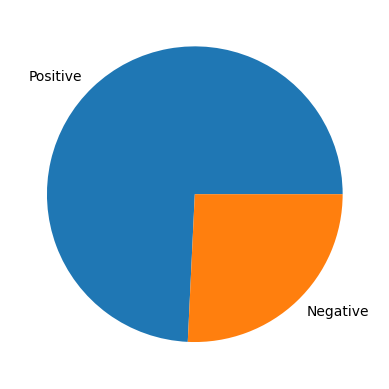

In [98]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

# handle imbalanced dataset

In [58]:
!pip install imbalanced-learn

In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9408, 1145) (9408,)


In [100]:
y_train_smote.value_counts()

label
0    4704
1    4704
Name: count, dtype: int64

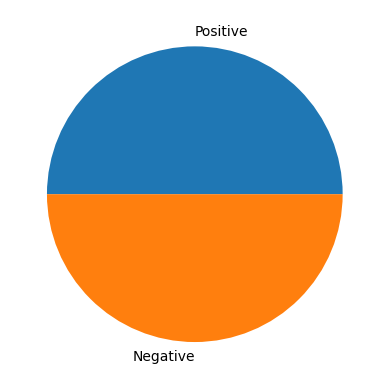

In [101]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [102]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [103]:
y_train_smote

0       0
1       1
2       0
3       1
4       0
       ..
9403    1
9404    1
9405    1
9406    1
9407    1
Name: label, Length: 9408, dtype: int64

In [104]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
y_test

4547    0
1081    0
5846    0
154     0
2005    1
       ..
1009    0
600     0
5174    0
1236    0
5396    1
Name: label, Length: 1584, dtype: int64

# model training and evaluation

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [107]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# logistic regression

In [116]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

#validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.915
	Recall = 0.97
	F1-Score = 0.942
